In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import textwrap
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.stats.multicomp

%pip install bioinfokit
from bioinfokit.analys import stat

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [3]:
### Loading and Reading data file ###
Data = pd.read_csv("INF2178_A4_data.csv")

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [5]:
# Checking for any missing values
Data.isna().any()

Unnamed: 0    False
Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [6]:
# Count of missing values 
Data.isna().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
# Rename columns for readability

dict = {'Subject ID': 'Subject_ID',
        'MRI ID': 'MRI_ID',
        'Visit': 'Visit_Number', 
        'MR Delay': 'MR_Delay',
        'M/F': 'Gender'}

Data.rename(columns=dict,
          inplace=True)

# Relabelling Gender Values 
Data['Gender'][Data['Gender'] == 'M'] = "Male"
Data['Gender'][Data['Gender'] == 'F'] = "Female"

In [8]:
# Replacing na values using mean values 
Data['SES'] = Data['SES'].fillna(Data['SES'].mean()) 
Data['MMSE'] = Data['MMSE'].fillna(Data['MMSE'].mean()) 

In [9]:
### Summary Statistics ###


# Creating a new dataset for relevant columns
MRI_DF = Data[["Age", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]]

# Creating base descriptive stats df
Summary_Stats_DF = pd.DataFrame(MRI_DF.describe())

# Relabelling index names 
Summary_Stats_DF = Summary_Stats_DF.rename(index={'count': 'Count', 
                                                  'mean': 'Mean', 
                                                  '50%': 'Median', 
                                                  'std': 'Standard Deviation', 
                                                  'min': 'Minimum', 
                                                  'max': 'Maximum', 
                                                  '25%': 'Quartile 1',
                                                  '75%': 'Quartile 3'})

# Reordering DF index for readability 
Summary_Stats_DF = Summary_Stats_DF.reindex(index=['Count', 'Mean', 'Standard Deviation',
                                                   'Median', 'Minimum', 'Maximum', 
                                                  'Quartile 1', 'Quartile 3'])

# Displaying summary statistics table 
round(Summary_Stats_DF, 3)

,Age,MMSE,CDR,eTIV,nWBV,ASF
Count,294.000,294.000,294.000,294.000,294.000,294.000
Mean,76.412,27.259,0.301,1478.854,0.731,1.203
Standard Deviation,7.607,3.408,0.381,176.560,0.037,0.139
Median,76.000,29.000,0.000,1461.500,0.732,1.201
Minimum,60.000,15.000,0.000,1106.000,0.646,0.876
Maximum,98.000,30.000,2.000,2004.000,0.837,1.587
Quartile 1,71.000,26.000,0.000,1347.250,0.703,1.118
Quartile 3,81.000,30.000,0.500,1569.000,0.756,1.303


In [10]:
### Overall Group Distribution ###

Group_Data = Data[['Group']]
Group_Data.value_counts()

Group      
Nondemented    142
Demented       126
Converted       26
Name: count, dtype: int64

In [11]:
### Overall Group vs Gender Distribution ###

# Grouping base data with relevant variables and calculating counts
Data.groupby(['Group', 'Gender']).size().unstack(fill_value=0)

Gender,Female,Male
Group,,
Converted,18,8
Demented,56,70
Nondemented,99,43


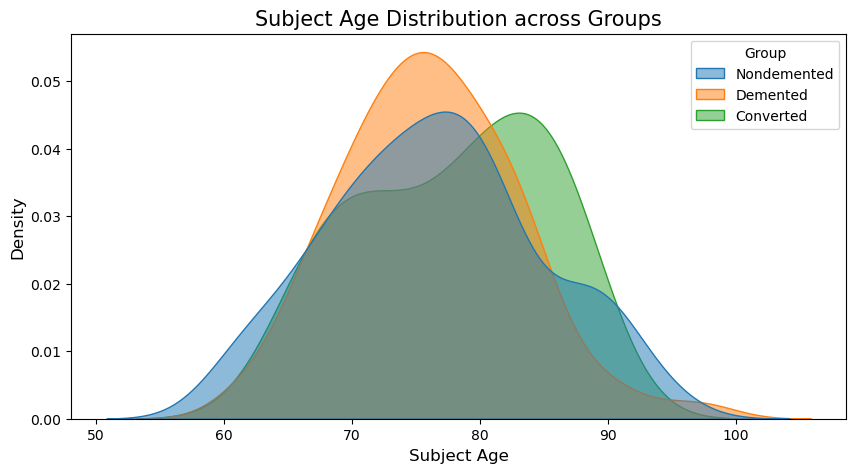

In [12]:
### Overall Age Distribution across groups ###

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting density plot 
sns.kdeplot(data=Data, x="Age", hue="Group", fill=True, common_norm=False, alpha=0.5)

# Adding title and axis names
plt.xlabel('Subject Age',size = 12) 
plt.ylabel('Density',size = 12) 
plt.title('Subject Age Distribution across Groups', size = 15) 

# Display graph
plt.show()

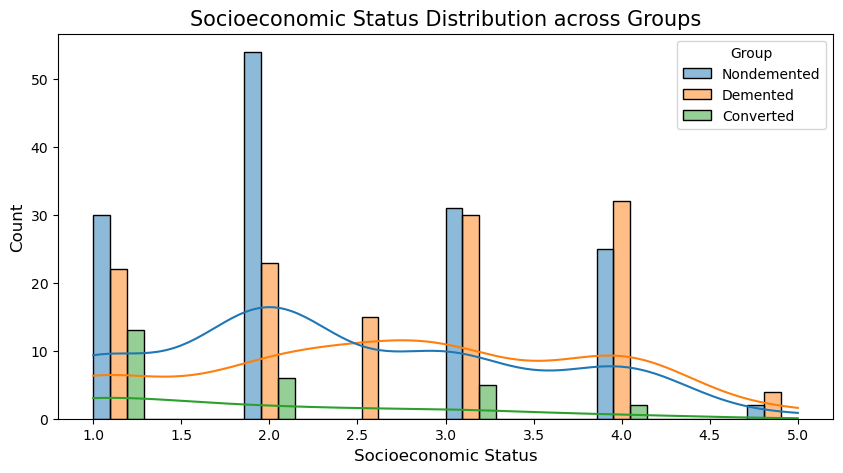

In [13]:
### Overall SES Distribution across Groups ###
# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting grouped histogram plot 
sns.histplot(data=Data, x="SES", hue = "Group", multiple = "dodge", kde = True)

# Adding title and axis names
plt.xlabel('Socioeconomic Status',size = 12) 
plt.ylabel('Count',size = 12) 
plt.title('Socioeconomic Status Distribution across Groups', size = 15) 

# Display graph
plt.show()

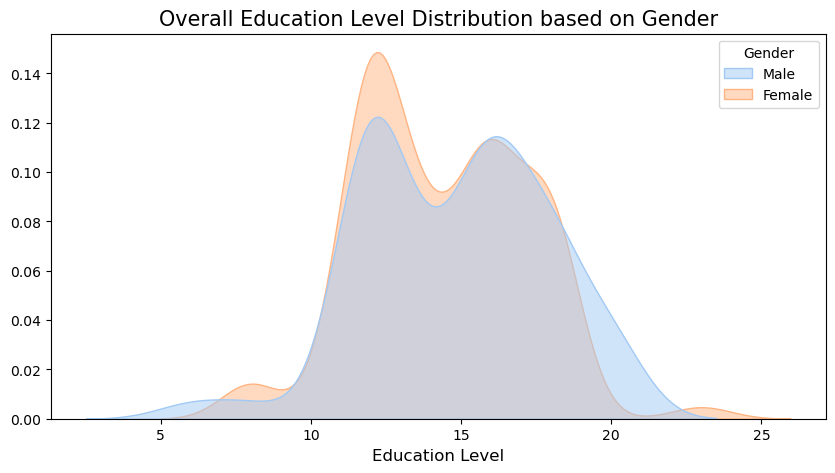

In [14]:
### Overall Education Distribution ###

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting density plot 
sns.kdeplot(data=Data, x="EDUC", hue = 'Gender', fill=True, common_norm=False, alpha=0.5, palette = 'pastel')

# Adding title and axis names
plt.xlabel('Education Level',size = 12) 
plt.ylabel('',size = 12) 
plt.title('Overall Education Level Distribution based on Gender', size = 15) 

# Display graph
plt.show()

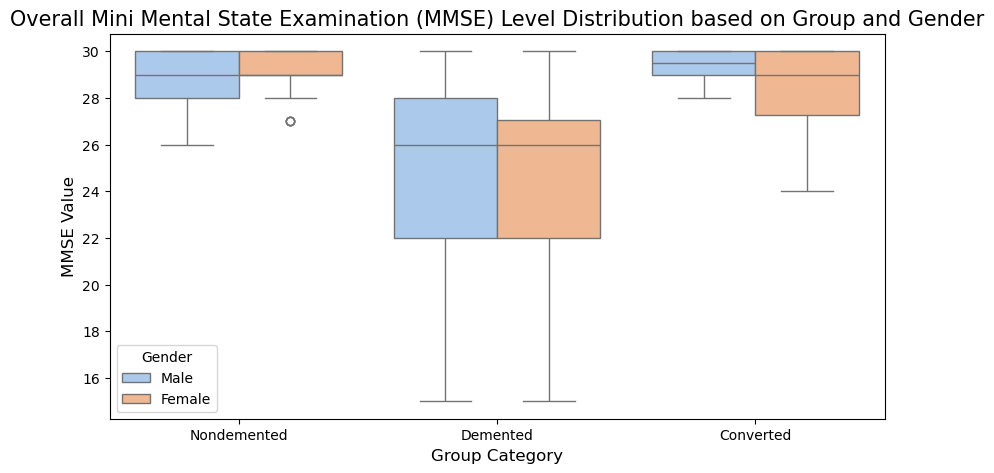

In [15]:
### Overall MMSE Distribution across Groups and Gender ###

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting density plot 
sns.boxplot(data=Data,x = 'Group', y="MMSE", hue = 'Gender', fill=True, palette = 'pastel')

# Adding title and axis names
plt.xlabel('Group Category',size = 12) 
plt.ylabel('MMSE Value',size = 12) 
plt.title('Overall Mini Mental State Examination (MMSE) Level Distribution based on Group and Gender', size = 15) 

# Display graph
plt.show()


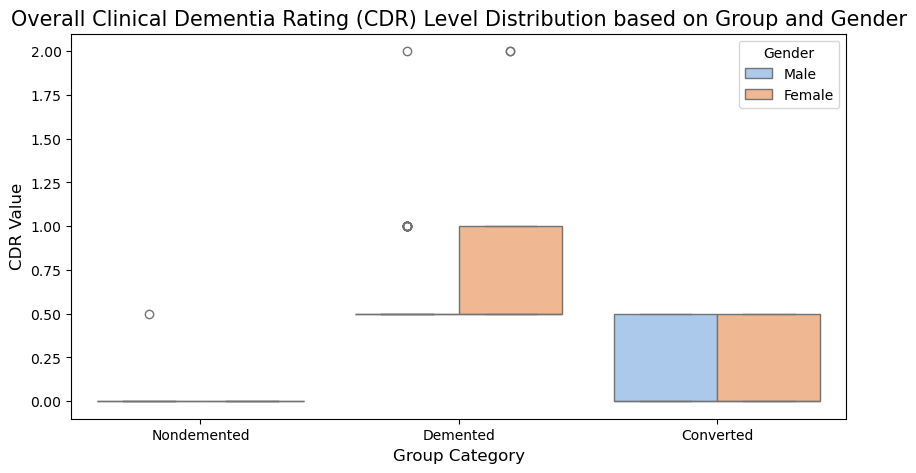

In [16]:
### Overall CDR Distribution across Groups and Gender ###

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting density plot 
sns.boxplot(data=Data,x = 'Group', y="CDR", hue = 'Gender', fill=True, palette = 'pastel')

# Adding title and axis names
plt.xlabel('Group Category',size = 12) 
plt.ylabel('CDR Value',size = 12) 
plt.title('Overall Clinical Dementia Rating (CDR) Level Distribution based on Group and Gender', size = 15) 

# Display graph
plt.show()


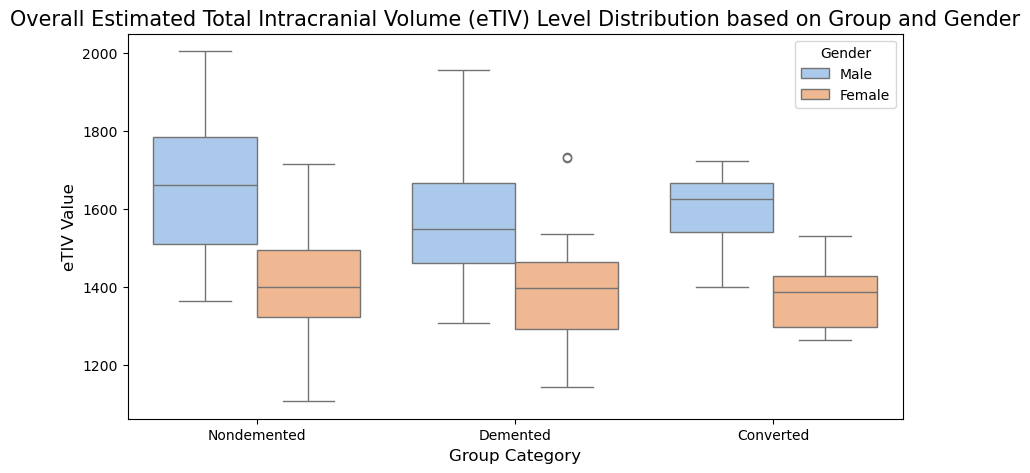

In [17]:
### Overall eTIV Distribution across Groups and Gender ###

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting density plot 
sns.boxplot(data=Data,x = 'Group', y="eTIV", hue = 'Gender', fill=True, palette = 'pastel')

# Adding title and axis names
plt.xlabel('Group Category',size = 12) 
plt.ylabel('eTIV Value',size = 12) 
plt.title('Overall Estimated Total Intracranial Volume (eTIV) Level Distribution based on Group and Gender', size = 15) 

# Display graph
plt.show()

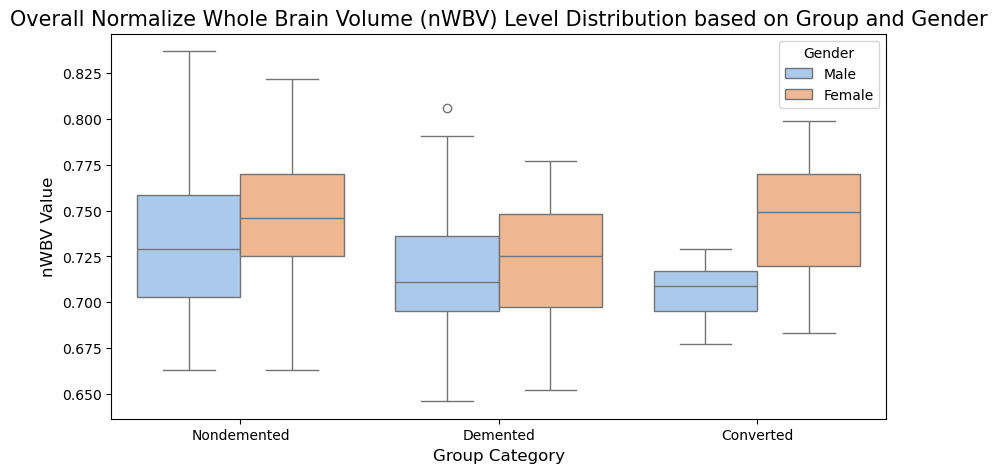

In [18]:
### Overall nWBV Distribution across Groups and Gender ###

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting density plot 
sns.boxplot(data=Data,x = 'Group', y="nWBV", hue = 'Gender', fill=True, palette = 'pastel')

# Adding title and axis names
plt.xlabel('Group Category',size = 12) 
plt.ylabel('nWBV Value',size = 12) 
plt.title('Overall Normalize Whole Brain Volume (nWBV) Level Distribution based on Group and Gender', size = 15) 

# Display graph
plt.show()

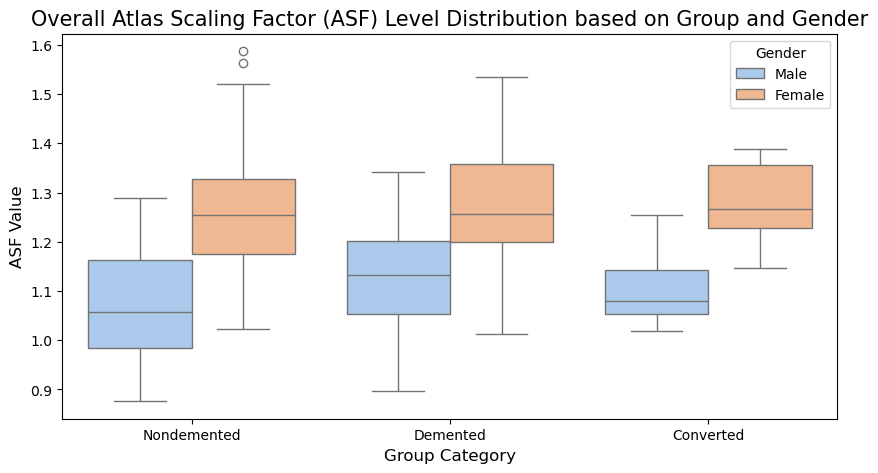

In [19]:
### Overall ASF Distribution across Groups and Gender ###

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting density plot 
sns.boxplot(data=Data,x = 'Group', y="ASF", hue = 'Gender', fill=True, palette = 'pastel')

# Adding title and axis names
plt.xlabel('Group Category',size = 12) 
plt.ylabel('ASF Value',size = 12) 
plt.title('Overall Atlas Scaling Factor (ASF) Level Distribution based on Group and Gender', size = 15) 

# Display graph
plt.show()

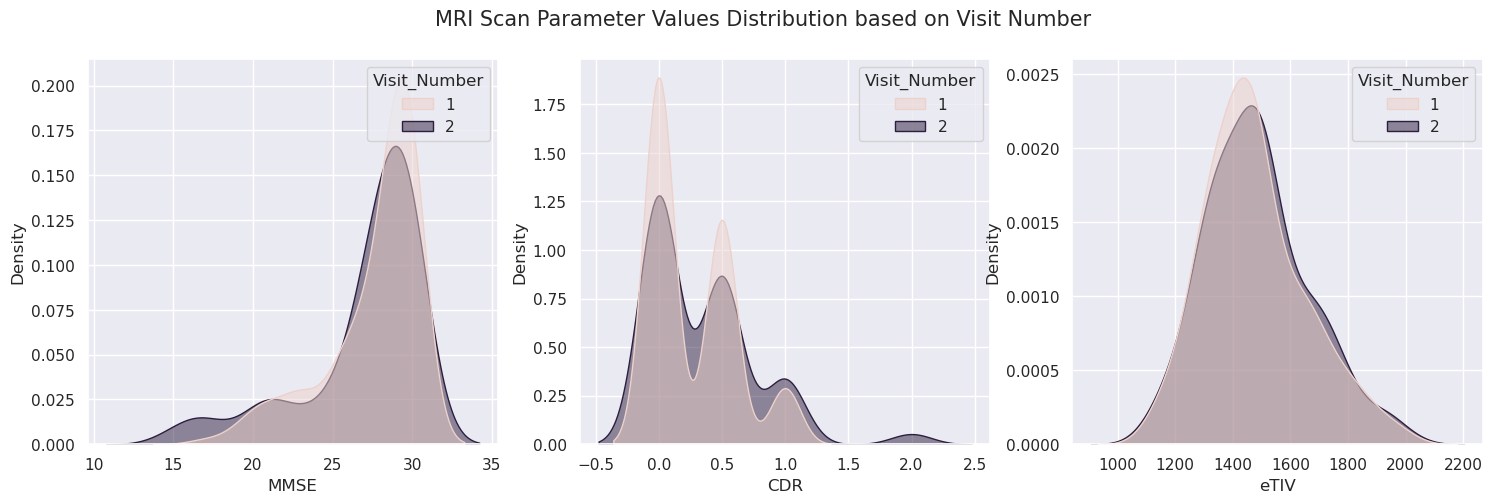

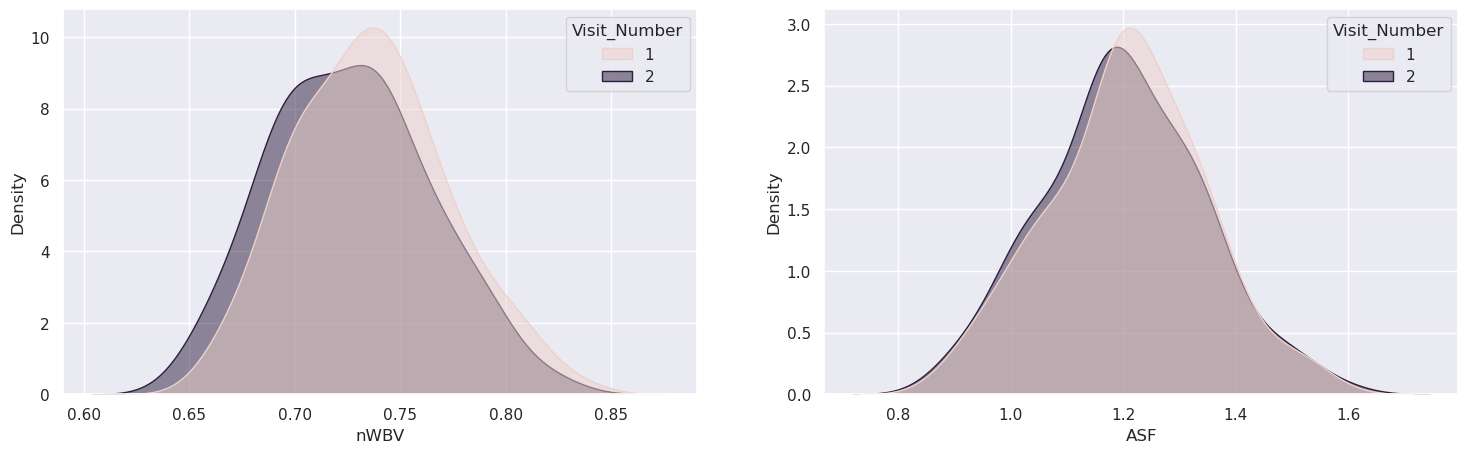

In [20]:
### Distribution of parameters based on Visit Number ###

# Setting plot dimensions 
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plt.suptitle("MRI Scan Parameter Values Distribution based on Visit Number", size = 15)

# Plotting relevant variables
sns.kdeplot(data=Data, x="MMSE", hue = 'Visit_Number', fill=True, common_norm=False, alpha=0.5, ax = axs[ 0])
sns.kdeplot(data=Data, x="CDR", hue = 'Visit_Number', fill=True, common_norm=False, alpha=0.5, ax=axs[1])
sns.kdeplot(data=Data, x="eTIV", hue = 'Visit_Number', fill=True, common_norm=False, alpha=0.5, ax=axs[2])
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.kdeplot(data=Data, x="nWBV", hue = 'Visit_Number', fill=True, common_norm=False, alpha=0.5, ax=axs[0])
sns.kdeplot(data=Data, x="ASF", hue = 'Visit_Number', fill=True, common_norm=False, alpha=0.5, ax=axs[1])


# Display plot
plt.show()

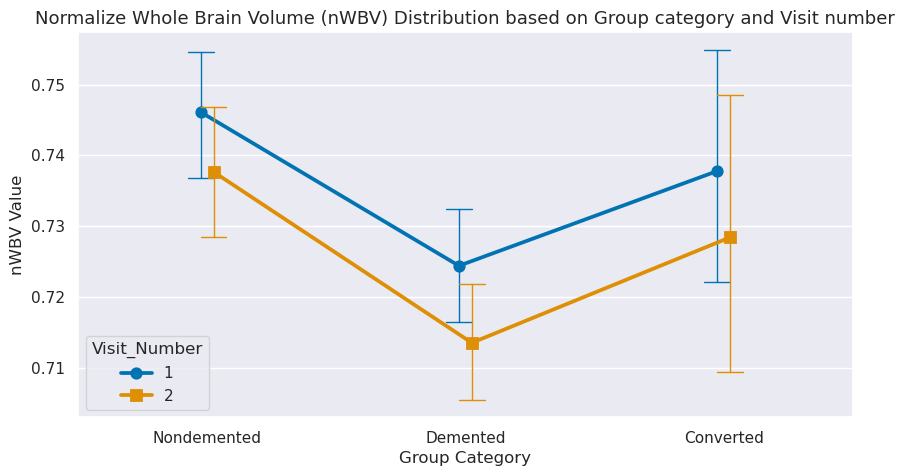

In [21]:
### Two Way Mixed Effect ANOVA - I ###

### To see group categorization have any impact on nWBV (Normalize Whole Brain Volume) values across the two visits ###


# Null hypothesis: Means of nWBV values among different groups across the visits are equal 
# Alternative hypothesis: There is at least one difference in the means of nWBV values among different groups across the visits

# Subsetting base dataframe for relevant columns
Data_I = Data[['Subject_ID', 'Group', 'Visit_Number', 'nWBV']]

## Overall distribution of nWBV Values

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Distribution of nWBV values - based on their group class and visit number
sns.pointplot(data=Data_I, x='Group', y='nWBV', hue='Visit_Number', 
              dodge=True, markers=['o', 's'],capsize=.1, errwidth=1, palette='colorblind')

# Adding title and axis names
plt.xlabel('Group Category',size = 12) 
plt.ylabel('nWBV Value',size = 12) 
plt.title('Normalize Whole Brain Volume (nWBV) Distribution based on Group category and Visit number', size = 13) 

# Display graph
plt.show()

In [22]:
# Perform the two-way mixed ANOVA using pingouin 

import pingouin as pg
model_I = pg.mixed_anova(dv='nWBV', between='Group', within='Visit_Number', subject='Subject_ID', data=Data_I)

# Printing the summary of the model
display(round(model_I,3))

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.034,2,141,0.017,6.712,0.002,0.087,NaN
1,Visit_Number,0.007,1,141,0.007,94.251,0.000,0.401,1.0
2,Interaction,0.000,2,141,0.000,1.534,0.219,0.021,NaN


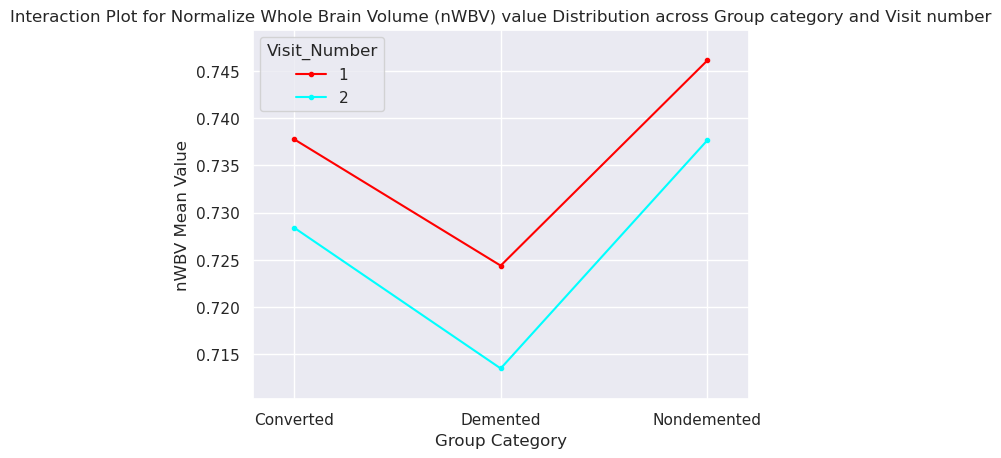

In [23]:
from statsmodels.graphics.factorplots import interaction_plot

# Plotting interaction plot 
ax = interaction_plot(x=Data_I['Group'], trace=Data_I['Visit_Number'], response=Data_I['nWBV'])

# Adding labels
plt.title("Interaction Plot for Normalize Whole Brain Volume (nWBV) value Distribution across Group category and Visit number", size = 12)
plt.xlabel("Group Category")
plt.ylabel("nWBV Mean Value")

# Displaying plot
plt.show();

In [24]:
# Post hoc Testing using pairwise t-tests
PosthocRes_I = pg.pairwise_ttests(dv='nWBV', within='Visit_Number', between='Group',
                              subject='Subject_ID', data=Data_I)

# Display results
display(PosthocRes_I)


,Contrast,Visit_Number,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit_Number,-,1,2,True,True,9.672288,143.000000,two-sided,2.460952e-17,2.258e+14,0.254531
1,Group,-,Converted,Demented,False,True,1.401412,14.675514,two-sided,1.818838e-01,0.668,0.469178
2,Group,-,Converted,Nondemented,False,True,-0.647523,15.832312,two-sided,5.265725e-01,0.361,-0.188440
3,Group,-,Demented,Nondemented,False,True,-3.690388,129.436150,two-sided,3.286561e-04,75.094,-0.632627
4,Visit_Number * Group,1,Converted,Demented,False,True,1.444264,14.626435,two-sided,1.697441e-01,0.701,0.485638
5,Visit_Number * Group,1,Converted,Nondemented,False,True,-0.465015,15.994963,two-sided,6.481884e-01,0.333,-0.133840
6,Visit_Number * Group,1,Demented,Nondemented,False,True,-3.413189,129.011431,two-sided,8.583121e-04,32.393,-0.584356
7,Visit_Number * Group,2,Converted,Demented,False,True,1.324162,14.879390,two-sided,2.054311e-01,0.615,0.435617
8,Visit_Number * Group,2,Converted,Nondemented,False,True,-0.811482,15.614690,two-sided,4.292861e-01,0.397,-0.239827
9,Visit_Number * Group,2,Demented,Nondemented,False,True,-3.856310,129.952323,two-sided,1.802558e-04,127.576,-0.662930


In [25]:

### Assumption Testing ###

# Defining level of significance
level_of_sig = 0.05

# Assumption 1: Assumption of sphericity using Mauchly’s test of sphericity

# H0: Variances of differences of nWBV values across visits are equal
# H1: Variances of differences of nWBV values across visits are not equal


SphericityRes_I = pg.sphericity(data=Data_I, dv='nWBV', subject='Subject_ID', within='Visit_Number')[-1]

# Printing results
print("Mauchly’s test of sphericity (p-value) - ", SphericityRes_I)

## Adding space between outputs 
print(" ")
print("__________________________________________________________________")
print(" ")

# Assumption 2: Test for normality using Shapiro Wilk test from pingouin

# H0: Data is normally distributed
# H1: Data is not normally distributed

NormalityRes_I =pg.normality(data=Data_I, dv='nWBV', group='Visit_Number')
print("Test for Normality Results - ")

# Printing results
display(round(NormalityRes_I, 3))

if((NormalityRes_I.pval[1]) > level_of_sig and (NormalityRes_I.pval[2]) > level_of_sig):
    print("Conclusion : Since p-val > 0.05 for both levels of visits, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the data is not normally distributed at each level of visit number")
else:
    print("Conclusion : Since p-val < 0.05 for both levels of visits, we reject the null hypothesis and conclude that the data is not normally distributed at each level of visit number")

## Adding space between outputs 
print(" ")
print("__________________________________________________________________")
print(" ")

# Assumption 3: Homogeneity of variances ; testing using Levene's test as data is not normally distributed

# H0: Groups have equal variances
# H1: Groups do not equal variances

Data_I_Visit_1 = Data_I[Data_I['Visit_Number'] == 1]
Data_I_Visit_2 = Data_I[Data_I['Visit_Number'] == 2]

print("Test for Homogeneity of Variances Results - ")


HVRes1_I = pg.homoscedasticity(Data_I_Visit_1, dv='nWBV', group='Group')

# Printing results
print("For Visit Number 1 - ")
display(round(HVRes1_I, 3))
if(HVRes1_I.pval.item() < level_of_sig):
    print("Conclusion : Since the p-value < 0.05, we reject the null hypothesis and conclude that the variances are not homogeneous")
else: 
    print("Conclusion : Since the p-value > 0.05, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous")

    
print(" ")
print("For Visit Number 2 - ")
HVRes2_I = pg.homoscedasticity(Data_I_Visit_2, dv='nWBV', group='Group')
display(round(HVRes2_I, 3))

if(HVRes2_I.pval.item() < level_of_sig):
    print("Conclusion : Since the p-value < 0.05, we reject the null hypothesis and conclude that the variances are not homogeneous")
else: 
    print("Conclusion : Since the p-value > 0.05, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous")


Mauchly’s test of sphericity (p-value) -  1.0
 
__________________________________________________________________
 
Test for Normality Results - 


,W,pval,normal
Visit_Number,,,
1,0.99,0.372,True
2,0.99,0.367,True


Conclusion : Since p-val > 0.05 for both levels of visits, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the data is not normally distributed at each level of visit number
 
__________________________________________________________________
 
Test for Homogeneity of Variances Results - 
For Visit Number 1 - 


,W,pval,equal_var
levene,1.045,0.354,True


Conclusion : Since the p-value > 0.05, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous
 
For Visit Number 2 - 


,W,pval,equal_var
levene,0.299,0.742,True


Conclusion : Since the p-value > 0.05, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous


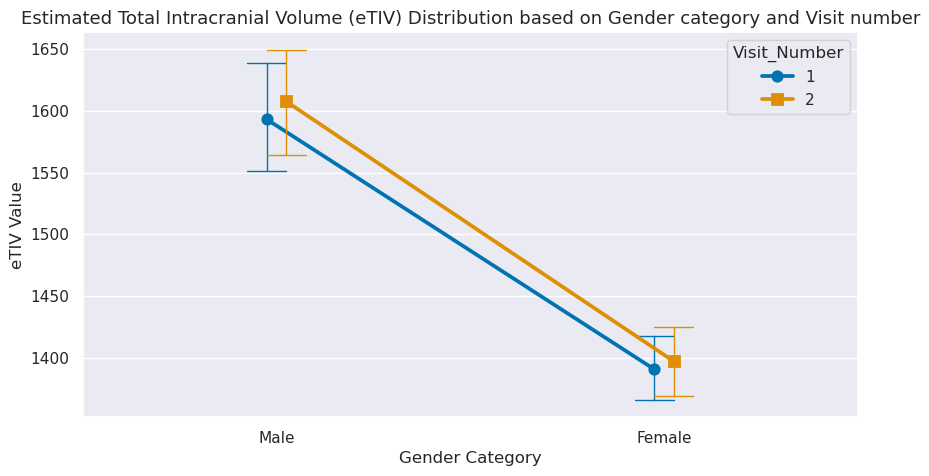

In [26]:
### Two-Way Mixed Effect ANOVA - II ###

### To see gender categorization have any impact on eTIV (Estimated Total Intracranial Volume) across the two visits ###


# Null hypothesis: Means of eTIV values among different genders across the visits are equal 
# Alternative hypothesis: There is at least one difference in the means of eTIV values among different genders across the visits

# Subsetting base dataframe for relevant columns
Data_II = Data[['Subject_ID', 'Gender', 'Visit_Number', 'eTIV']]


## Overall distribution of nWBV Values

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Distribution of nWBV values - based on their group class and visit number
sns.pointplot(data=Data_II, x='Gender', y='eTIV', hue='Visit_Number', 
              dodge=True, markers=['o', 's'],capsize=.1, errwidth=1, palette='colorblind')

# Adding title and axis names
plt.xlabel('Gender Category',size = 12) 
plt.ylabel('eTIV Value',size = 12) 
plt.title('Estimated Total Intracranial Volume (eTIV) Distribution based on Gender category and Visit number', size = 13) 

# Display graph
plt.show()

In [27]:
# Perform the two-way mixed ANOVA using pingouin 

import pingouin as pg
model_II = pg.mixed_anova(dv='eTIV', between='Gender', within='Visit_Number', subject='Subject_ID', data=Data_II)

# Printing the summary of the model
display(round(model_II, 3))

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Gender,3023632.352,1,142,3023632.352,72.906,0.000,0.339,NaN
1,Visit_Number,5573.920,1,142,5573.920,9.208,0.003,0.061,1.0
2,Interaction,238.477,1,142,238.477,0.394,0.531,0.003,NaN


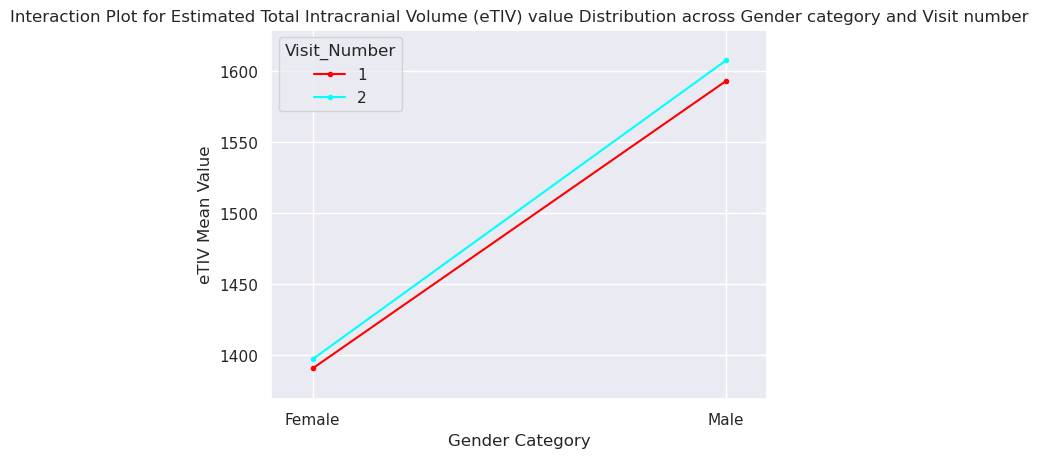

In [28]:
from statsmodels.graphics.factorplots import interaction_plot

# Plotting interaction plot 
ax = interaction_plot(x=Data_II['Gender'], trace=Data_II['Visit_Number'], response=Data_II['eTIV'])

# Adding labels
plt.title("Interaction Plot for Estimated Total Intracranial Volume (eTIV) value Distribution across Gender category and Visit number", size = 12)
plt.xlabel("Gender Category")
plt.ylabel("eTIV Mean Value")

# Displaying plot
plt.show();

In [29]:
# Post hoc Testing using pairwise t-tests
PosthocRes_II = pg.pairwise_ttests(dv='eTIV', within='Visit_Number', between='Gender',
                              subject='Subject_ID', data=Data_II)

# Display results
display(PosthocRes_II)

,Contrast,Visit_Number,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit_Number,-,1,2,True,True,-3.040838,143.000000,two-sided,2.806898e-03,7.532,-0.049472
1,Gender,-,Female,Male,False,True,-8.096701,100.490719,two-sided,1.369384e-12,2.529e+10,-1.439212
2,Visit_Number * Gender,1,Female,Male,False,True,-8.025775,99.653316,two-sided,2.038871e-12,1.728e+10,-1.429301
3,Visit_Number * Gender,2,Female,Male,False,True,-8.052794,101.407543,two-sided,1.620329e-12,1.997e+10,-1.428470


In [30]:

### Assumption Testing ###

# Defining level of significance
level_of_sig = 0.05

# Assumption 1: Assumption of sphericity using Mauchly’s test of sphericity

# H0: Variances of differences of nWBV values across visits are equal
# H1: Variances of differences of nWBV values across visits are not equal


SphericityRes_II = pg.sphericity(data=Data_II, dv='eTIV', subject='Subject_ID', within='Visit_Number')[-1]

# Printing results
print("Mauchly’s test of sphericity (p-value) - ", SphericityRes_II)

## Adding space between outputs 
print(" ")
print("__________________________________________________________________")
print(" ")

# Assumption 2: Test for normality using Shapiro Wilk test from pingouin

# H0: Data is normally distributed
# H1: Data is not normally distributed

NormalityRes_II =pg.normality(data=Data_II, dv='eTIV', group='Visit_Number')
print("Test for Normality Results - ")

# Printing results
display(round(NormalityRes_II, 3))

if((NormalityRes_II.pval[1]) > level_of_sig and (NormalityRes_II.pval[2]) > level_of_sig):
    print("Conclusion : Since p-val > 0.05 for both levels of visits, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the data is not normally distributed at each level of visit number")
else:
    print("Conclusion : Since p-val < 0.05 for both levels of visits, we reject the null hypothesis and conclude that the data is not normally distributed at each level of visit number")

## Adding space between outputs 
print(" ")
print("__________________________________________________________________")
print(" ")

# Assumption 3: Homogeneity of variances ; testing using Levene's test as data is not normally distributed

# H0: Groups have equal variances
# H1: Groups do not equal variances

Data_II_Visit_1 = Data_II[Data_II['Visit_Number'] == 1]
Data_II_Visit_2 = Data_II[Data_II['Visit_Number'] == 2]

print("Test for Homogeneity of Variances Results - ")


HVRes1_II = pg.homoscedasticity(Data_II_Visit_1, dv='eTIV', group='Gender')

# Printing results
print("For Visit Number 1 - ")
display(round(HVRes1_II, 3))
if(HVRes1_II.pval.item() < level_of_sig):
    print("Conclusion : Since the p-value < 0.05, we reject the null hypothesis and conclude that the variances are not homogeneous")
else: 
    print("Conclusion : Since the p-value > 0.05, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous")

    
print(" ")
print("For Visit Number 2 - ")

HVRes2_II = pg.homoscedasticity(Data_II_Visit_2, dv='eTIV', group='Gender')
display(round(HVRes2_II, 3))

if(HVRes2_II.pval.item() < level_of_sig):
    print("Conclusion : Since the p-value < 0.05, we reject the null hypothesis and conclude that the variances are not homogeneous")
else: 
    print("Conclusion : Since the p-value > 0.05, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous")


Mauchly’s test of sphericity (p-value) -  1.0
 
__________________________________________________________________
 
Test for Normality Results - 


,W,pval,normal
Visit_Number,,,
1,0.969,0.002,False
2,0.977,0.016,False


Conclusion : Since p-val < 0.05 for both levels of visits, we reject the null hypothesis and conclude that the data is not normally distributed at each level of visit number
 
__________________________________________________________________
 
Test for Homogeneity of Variances Results - 
For Visit Number 1 - 


,W,pval,equal_var
levene,10.368,0.002,False


Conclusion : Since the p-value < 0.05, we reject the null hypothesis and conclude that the variances are not homogeneous
 
For Visit Number 2 - 


,W,pval,equal_var
levene,6.765,0.01,False


Conclusion : Since the p-value < 0.05, we reject the null hypothesis and conclude that the variances are not homogeneous


In [31]:
### Power Analysis ###

# Importing required modules 
from math import sqrt 
from statsmodels.stats.power import TTestIndPower 

# Running statistical power analysis using 3 known variables - to find for sample size (4th variable)
Power_Analysis_Obj = TTestIndPower() 

Sample_Size = Power_Analysis_Obj.solve_power(effect_size=0.7, alpha=0.05, power=0.91,  
                    ratio=1, alternative='two-sided') 

Sample_Size = round(Sample_Size, 3)

# Printing results  
print("Using Statistical Power Analysis - ")
print('Sample size needed in each group:', Sample_Size)

Using Statistical Power Analysis - 
Sample size needed in each group: 45.451


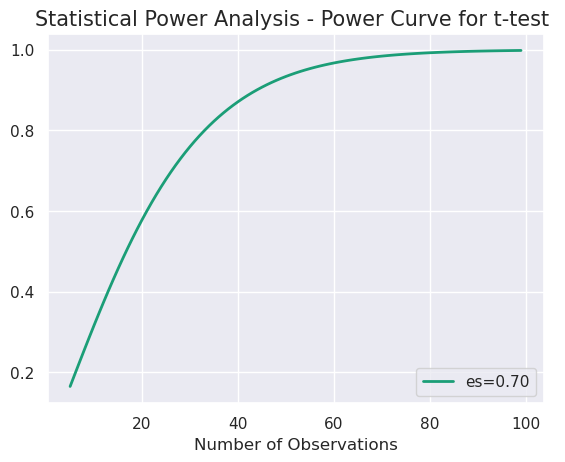

In [32]:
### Plotting power curves ###

## Defining parameters

# Predefined effect size (Cohen's-d)
Effect_Sizes = np.array([0.7])

# Sample size array
Sample_Sizes = np.array(range(5, 100))

# Plot power curves
PowerCurve_Obj = TTestIndPower()
PowerCurve_Obj.plot_power(dep_var='nobs', nobs=Sample_Sizes, effect_size=Effect_Sizes, alpha = 0.05)

# Adding title 
plt.title("Statistical Power Analysis - Power Curve for t-test ", size = 15)

# Display plot
plt.show()
